# Titanic Survival Prediction using Logistic Regression

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

# Objective

In this project we will try to build a predictive model which can tell us what sort of people will survive or not.

WORKFLOW

1)Data

2)Data Preprocessing

3)Data Analysis

4)Train Test Split

5)Logistic Regression Model

6)Evaluation of Model

In [55]:
#Importing the libraries
 
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

DATA COLLECTION AND PREPROCESSING 

In [56]:
#Loading the dataset 
titanic=pd.read_csv("C:\\Users\\vedan\\Downloads\\train (1).csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
#number of rows and columns
titanic.shape

(891, 12)

In [58]:
#Data Types of Column
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [59]:
#some information about data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [60]:
#check the number of missing values in each column
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [61]:
#Handling the missing values

In [62]:
#Dropping the 'cabin' column as most of it's values are null.
titanic=titanic.drop('Cabin',axis=1)

In [63]:
#Replacing the null values in 'age' column with mean values
titanic['Age']=titanic['Age'].fillna(value=titanic['Age'].mean())

In [64]:
#Replacing null valus in 'Embarked' column with mode values
titanic['Embarked']=titanic['Embarked'].fillna(value=titanic['Embarked'].mode()[0]) #[0] is the index of most repeated value i.e. S

In [65]:
#Checking the missing values in each column
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

DATA ANALYSIS

In [66]:
#getting some statistical measures about the data
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [67]:
#finding the number of people who survived or not
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [68]:
#finding the gender of people on titanic
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

DATA VISUALIZATION

In [69]:
sns.set()

<AxesSubplot:xlabel='Survived', ylabel='count'>

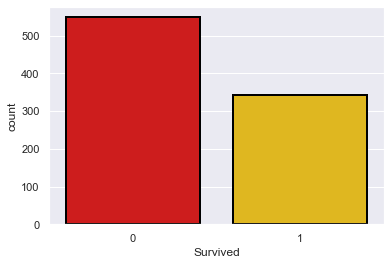

In [70]:
#Making a Countplot for 'Survived' Column
sns.countplot(x='Survived',data=titanic,palette='hot',edgecolor='black',lw=2)

<AxesSubplot:xlabel='Sex', ylabel='count'>

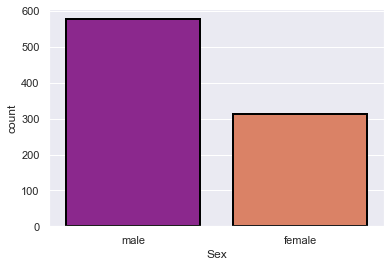

In [71]:
#Coutplot for 'Sex' column
sns.countplot(x='Sex',data=titanic,palette='plasma',edgecolor='black',lw=2)

<AxesSubplot:xlabel='Sex', ylabel='count'>

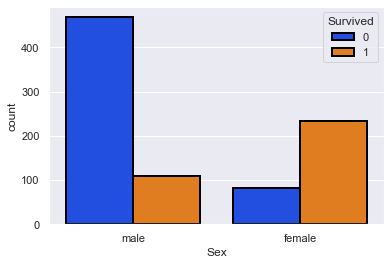

In [72]:
#number of survivors gender wise
sns.countplot(x='Sex',data=titanic,hue='Survived',edgecolor='black',palette='bright',lw=2)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

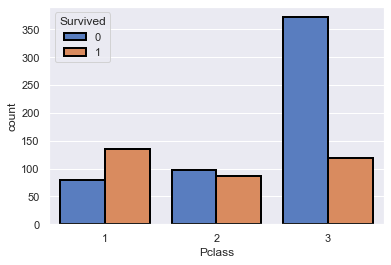

In [73]:
#number of survivors Passenger Class wise
sns.countplot(x='Pclass',data=titanic,hue='Survived',edgecolor='black',palette='muted',lw=2)

<AxesSubplot:>

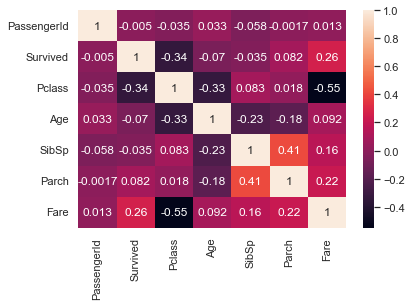

In [74]:
#Coorelation map
corr=titanic.corr()
sns.heatmap(corr,annot=True)

Encoding Categorical Columns

In [86]:
#Converting Categoring Columns
#Categorical columns are 'Sex' and 'Embarked'

titanic.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)


In [87]:
#Checking if columns are encoded
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


Separating features and target variables

In [89]:
X=titanic.drop(['PassengerId','Survived','Name','Ticket'],axis=1)
Y=titanic.Survived

In [92]:
X


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [93]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Splitting the data into training and testing data


In [94]:
#Using train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2

In [95]:
print(X.shape,X_train.shape,X_test.shape)

(891, 7) (712, 7) (179, 7)


Model Training

In [97]:
model=LogisticRegression()

In [98]:
model.fit(X_train,Y_train)

LogisticRegression()

Accuracy Score

In [99]:
X_train_predictions=model.predict(X_train)

In [100]:
print(X_train_predictions)

[0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0
 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0
 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0
 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1
 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1
 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 1 

In [105]:
training_data_accuracy=accuracy_score(Y_train,X_train_predictions)
print('Accuracy Score for traing data:',training_data_accuracy)

Accuracy Score for traing data: 0.8132022471910112


In [106]:
X_test_predictions=model.predict(X_test)

In [107]:
testing_data_accuracy=accuracy_score(Y_test,X_test_predictions)
print('Accuracy Score for testing data is:',testing_data_accuracy)

Accuracy Score for testing data is: 0.776536312849162


So, we can see our model works pretty decent with training and testing data. We can also try out other models. 

THANK YOU!